<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/TP2/Tp2_CyT_CLAUDINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Para visualización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx

from glob import glob
from pathlib import Path
import community
!pip install networkx
!pip install powerlaw
!pip install community
import powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24788 sha256=a4257fa1c53558eebcbf1e136cec9d0391086bd2eaa605382be9570021423227
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [2]:
!wget -q https://www.dropbox.com/s/eei6gnw10o20mcn/DataSujetos.zip?dl=1 -O DataSujetos.zip
!unzip -q DataSujetos

#  TP2: Redes en el Cerebro

# 1. Visualización


In [3]:
def subjectmatrix2graphslist_2(correlation_matrix, densities):
    """
    Toma una matriz de input y devuelve una lista de grafos con la densidad de aristas correspondiente
    """
    
    n = correlation_matrix.shape[0]
    n2m1 = (n*n-1)
    
    sorted_correlations = sorted(correlation_matrix.values.flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*n2m1)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs

def subjectmatrix2graphslist_2_TO_ONE(correlation_matrix, density):
    """
    Toma una matriz de input y devuelve una lista de grafos con la densidad de aristas correspondiente
    """
    
    n = correlation_matrix.shape[0]
    n2m1 = (n*n-1)
    
    sorted_correlations = sorted(correlation_matrix.values.flatten(),reverse=True)
  
    idx = int(density*n2m1)
    threshold = sorted_correlations[idx]
    Gs=nx.from_pandas_adjacency(correlation_matrix>=threshold)
        
    return Gs


   ### Calculo Matriz Promedio por Estadíos

In [4]:
## Aqui comienza

estadios=["W","N1","N2","N3"]
matrices=[]

for e in estadios:
    # inicializo matriz con ceros  
    matriz_promedio = []
    for i in range(116):
        a = [0]*116
        matriz_promedio.append(a)
      
    # leo y sumo las matrices de todos los sujetos para el estadio e 
    filenames = glob('DataSujetos/'+e+'_*.csv')   

    for filename in filenames:
        correlation_matrix = pd.read_csv(filename, header=None)
        
        n = correlation_matrix.shape[0]
        correlation_matrix -= np.diag(np.ones(n))
        matriz_promedio= np.add(matriz_promedio, correlation_matrix)

    # Hago el promedio
    matriz_promedio= matriz_promedio/18
    # La guardo 
    matrices.append(matriz_promedio)
#print(matrices)


In [ ]:
estadios=["W","N1","N2","N3"]
matrices_sujetos=[]

for e in estadios:
    
    # leo y sumo las matrices de todos los sujetos para el estadio e 
    filenames = glob('DataSujetos/'+e+'_*.csv')   

    for filename in filenames:
        correlation_matrix = pd.read_csv(filename, header=None)
        #print(correlation_matrix)
        #matrices_sujetos_['estadio'] = e
        #matrices_sujetos_['grafo'] = correlation_matrix
        n = correlation_matrix.shape[0]
        correlation_matrix -= np.diag(np.ones(n))
        
        matrices_sujetos.append(correlation_matrix)
      
   
# print(matrices_sujetos)

<Figure size 432x432 with 0 Axes>

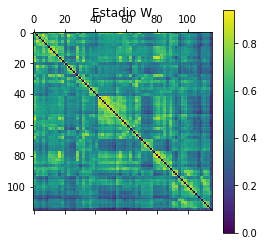

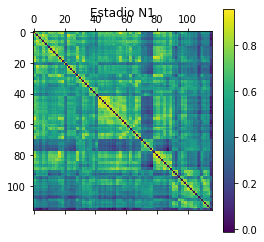

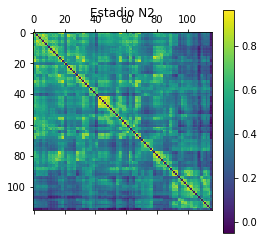

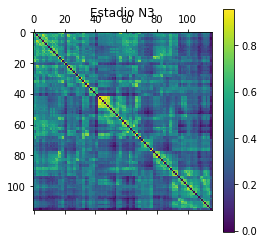

In [6]:
plt.figure(figsize=(6,6))
for i, e in enumerate(estadios):    
#   plt.subplot(2,2,i+1)
    plt.matshow(matrices[i])
    plt.colorbar()
    plt.title('Estadio '+e)
    

W 0
N1 1
N2 2
N3 3


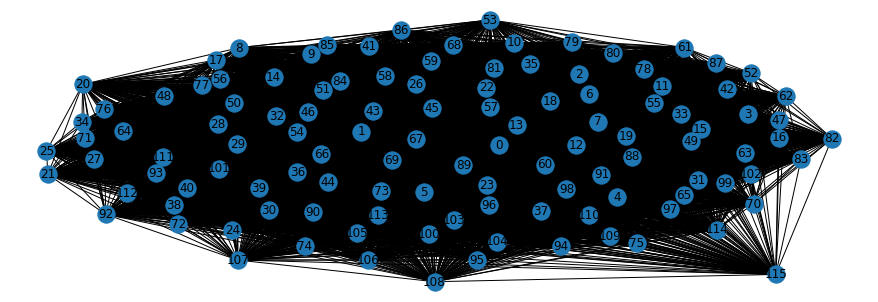

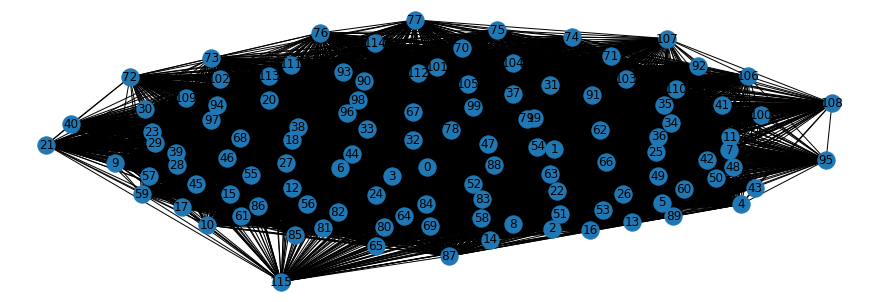

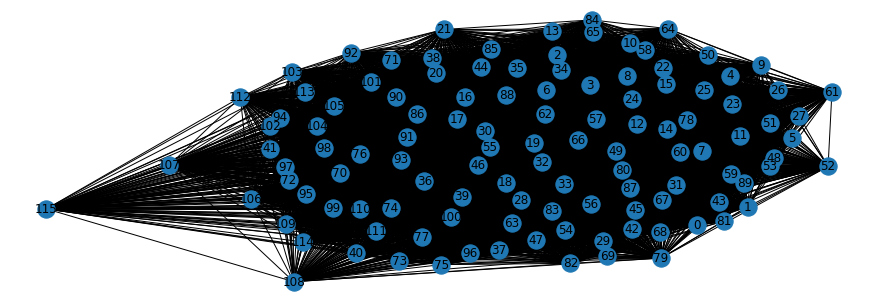

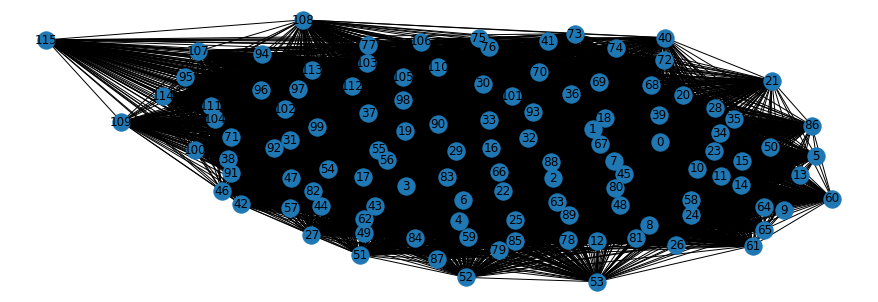

In [7]:
for i, e in enumerate(estadios):    
    print(e, i)
    G_promedio = nx.from_pandas_adjacency(matrices[i])
    plt.figure(figsize=(12,4))
    #plt.subplot(131)
    nx.draw(G_promedio, with_labels=True)

W 0
N1 1
N2 2
N3 3


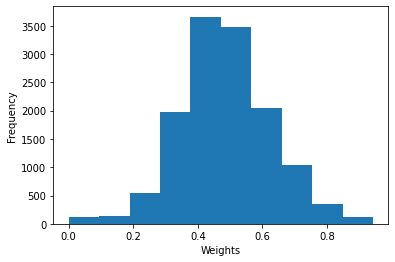

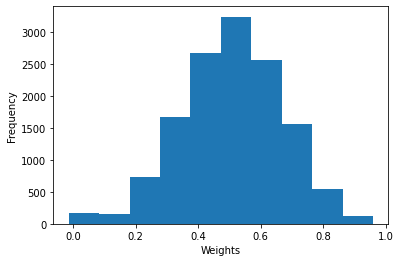

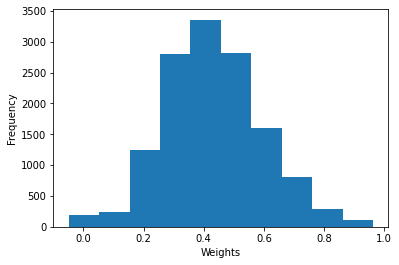

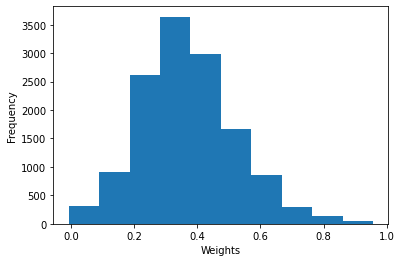

In [8]:
for i, e in enumerate(estadios):    
    print(e, i)
    plt.figure()
    plt.hist(matrices[i].values.flatten())
    plt.ylabel('Frequency')
    plt.xlabel('Weights');


In [9]:
# Para cada estadío, genero grafos para 50 densidades entre 0 y 0.3
# Estos serían los grafos no pesados para distintas densidades
estadios=["W","N1","N2","N3"]
densities = np.linspace(0,0.3,50)

graphs = {}
for i,e in enumerate(estadios):
    Gs = subjectmatrix2graphslist_2(matrices[i], densities)
    name = e
    print(i)
    graphs[name] = Gs

0
1
2
3


In [ ]:
graphs['N1']

In [ ]:
matrices_sujetos

In [12]:
# Para cada sujeto, genero grafos para 50 densidades entre 0 y 0.3
# Estos serían los grafos no pesados para distintas densidades
estadios=["W","N1","N2","N3"]
densities = np.linspace(0,0.3,50)

graphs_sujeto = []
#for i,e in enumerate(estadios):
for i in range(0,18):
    
    Gs = subjectmatrix2graphslist_2(matrices_sujetos[i], densities)

    graphs_sujeto.append(Gs)   
    

for i in range(18,36):
    Gs = subjectmatrix2graphslist_2(matrices_sujetos[i], densities)
    graphs_sujeto.append(Gs)   


for i in range(36,54):
    Gs = subjectmatrix2graphslist_2(matrices_sujetos[i], densities)
    graphs_sujeto.append(Gs) 

for i in range(54,72):
    Gs = subjectmatrix2graphslist_2(matrices_sujetos[i], densities)
    graphs_sujeto.append(Gs) 

In [ ]:
graphs['N1']


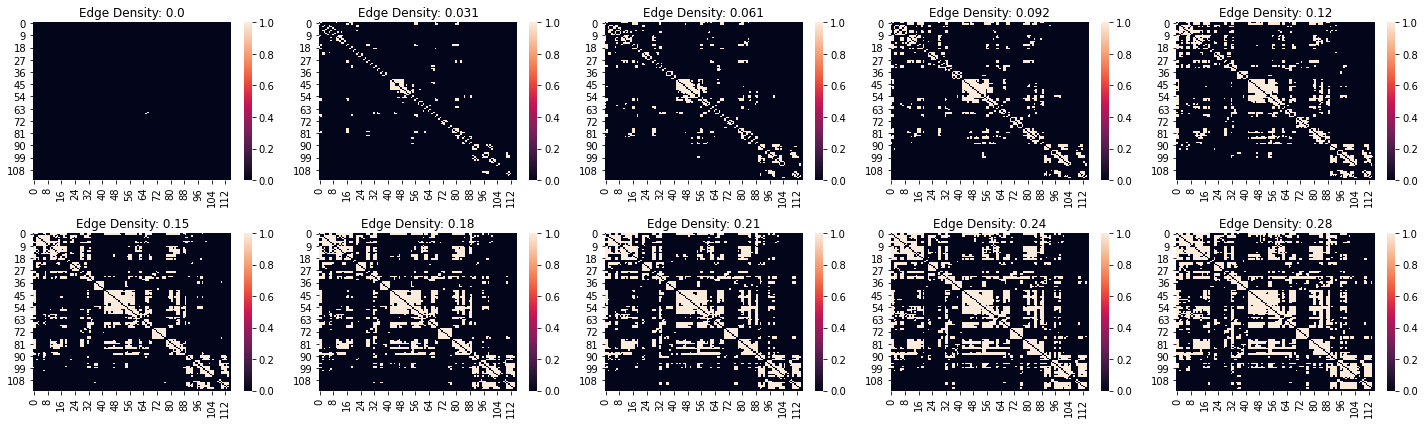

In [14]:
# Muestro matrices de estadío "W", para algunas densidades (::5 entiendo que esto va cada 5, y entonces trae 10 grafos )

plt.figure(figsize=(20,6))
for i, G in enumerate(graphs['W'][::5][:10]):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G))
    plt.title('Edge Density: {:0.2}'.format(densities[i*5]))
plt.tight_layout()

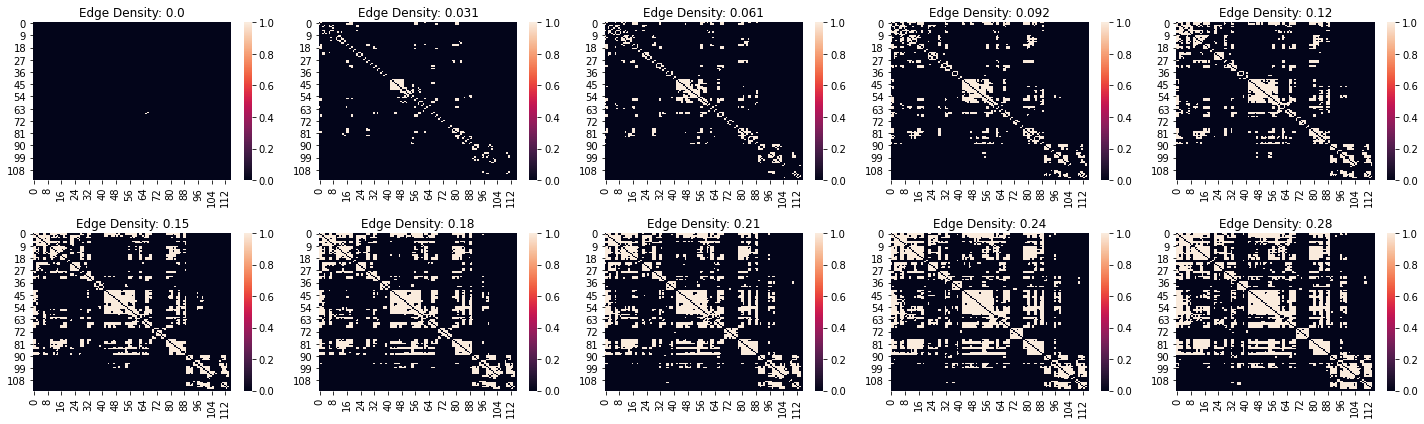

In [15]:
# Igual que lo anterior para estadío N1

plt.figure(figsize=(20,6))
for i, G in enumerate(graphs['N1'][::5][:10]):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G))
    plt.title('Edge Density: {:0.2}'.format(densities[i*5]))
plt.tight_layout()

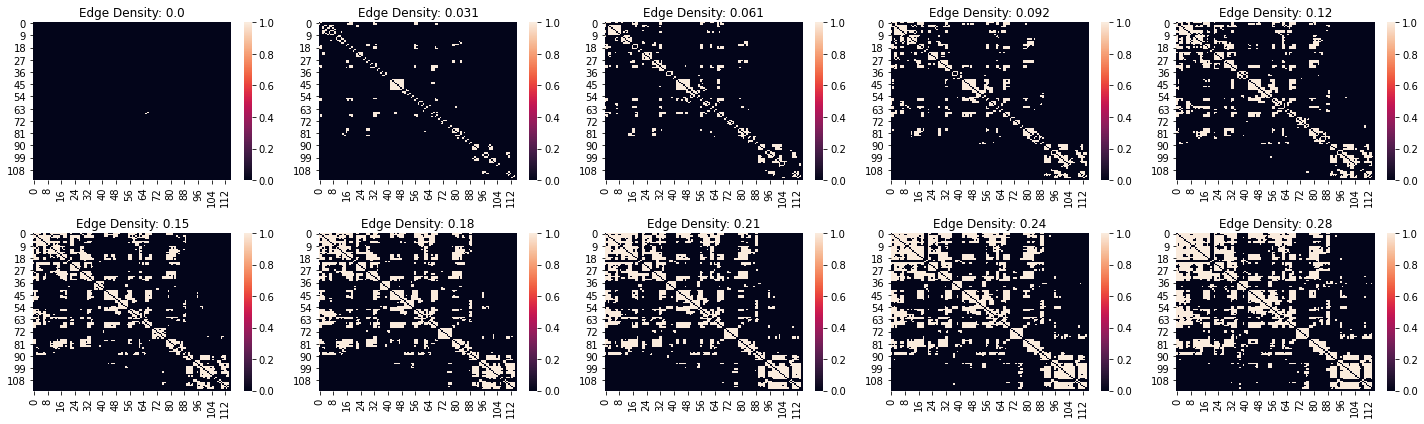

In [16]:
# Igual que lo anterior para estadío N2

plt.figure(figsize=(20,6))
for i, G in enumerate(graphs['N2'][::5][:10]):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G))
    plt.title('Edge Density: {:0.2}'.format(densities[i*5]))
plt.tight_layout()

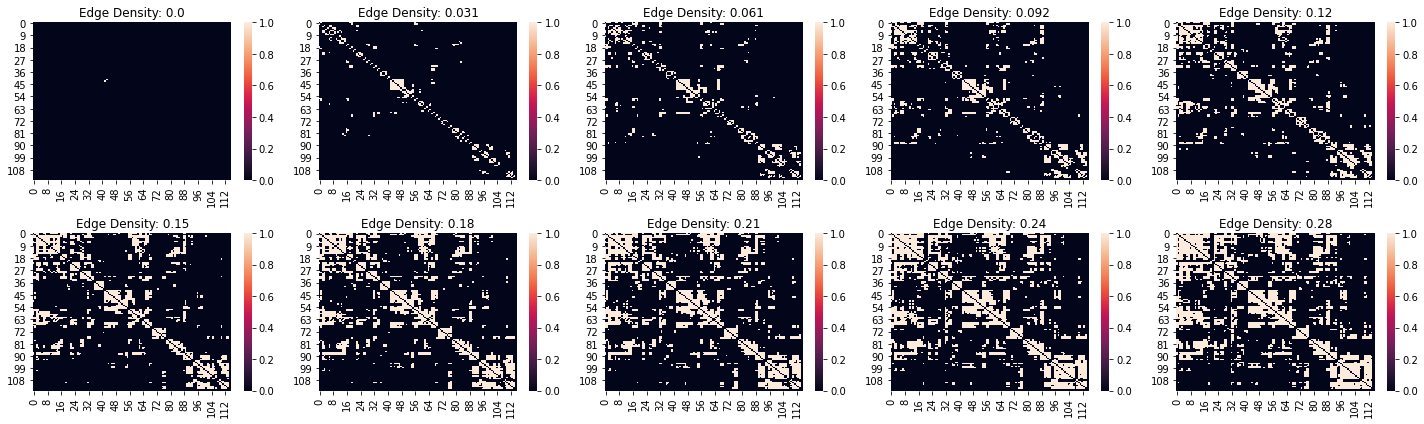

In [17]:
# Igual que lo anterior para estadío N3

plt.figure(figsize=(20,6))
for i, G in enumerate(graphs['N3'][::5][:10]):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G))
    plt.title('Edge Density: {:0.2}'.format(densities[i*5]))
plt.tight_layout()

Text(0.5, 1.0, 'Edge Density: 0.21')

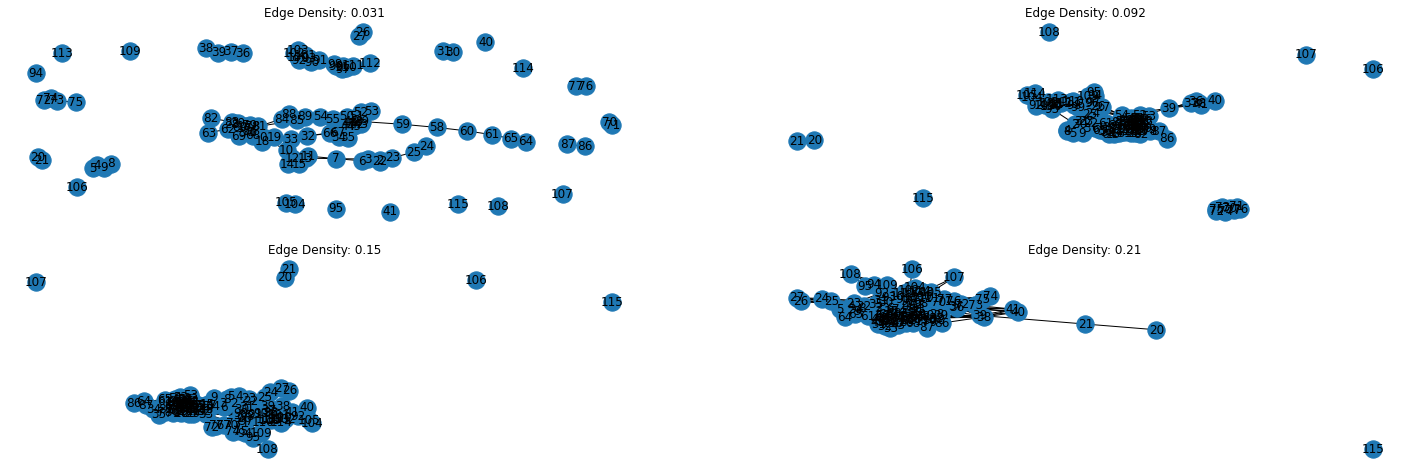

In [18]:
# Visualizar el grafo no pesado para distintos valores de δ que resulten interesantes. 
# visualizarlo como grafo 

plt.figure(figsize=(25,8))
plt.subplot(2,2,1)
nx.draw(graphs['W'][5],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[5]))
plt.subplot(2,2,2)
nx.draw(graphs['W'][15],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[15]))
plt.subplot(2,2,3)
nx.draw(graphs['W'][25],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[25]))
plt.subplot(2,2,4)
nx.draw(graphs['W'][35],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[35]))


Text(0.5, 1.0, 'Edge Density: 0.21')

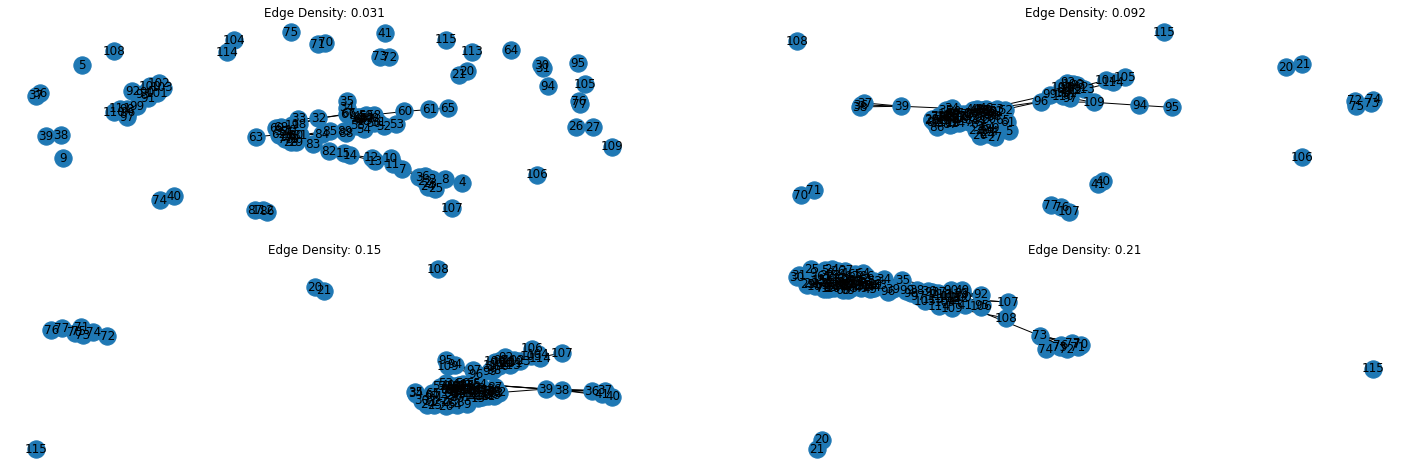

In [19]:
# Visualizar el grafo no pesado para distintos valores de δ que resulten interesantes. 
# visualizarlo como grafo 

plt.figure(figsize=(25,8))
plt.subplot(2,2,1)
nx.draw(graphs['N1'][5],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[5]))
plt.subplot(2,2,2)
nx.draw(graphs['N1'][15],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[15]))
plt.subplot(2,2,3)
nx.draw(graphs['N1'][25],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[25]))
plt.subplot(2,2,4)
nx.draw(graphs['N1'][35],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[35]))


In [ ]:
#falta agregar 2 estadios N2 y N3

In [20]:
avg_clustering = []
names= []
for name, Gs in graphs.items():
    avg_clustering_ = [nx.average_clustering(G) for G in Gs]
    names_ = name
    
    avg_clustering.append(avg_clustering_)
    names.append(names_)
avg_clustering = np.vstack(avg_clustering)

In [ ]:
avg_clustering

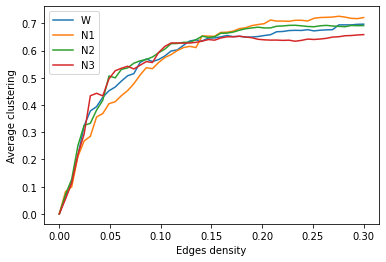

In [22]:
plt.plot(densities, avg_clustering.T);
plt.legend(names)
plt.xlabel('Edges density')
plt.ylabel('Average clustering');

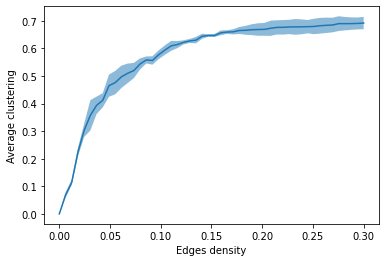

In [23]:
u = avg_clustering.mean(0)
s = avg_clustering.std(0)
plt.fill_between(densities,u-s,u+s, alpha=0.5);
plt.plot(densities, u);
plt.xlabel('Edges density')
plt.ylabel('Average clustering');

In [71]:
names

['W', 'N1', 'N2', 'N3']

In [ ]:
from statistics import mean 

avg_centrality = []
names= []
for name, Gs in graphs.items():

    
    avg_centrality_ = [nx.degree_centrality(G) for G in Gs]

    avg_centrality_2 = [mean(A.values()) for A in avg_centrality_]

    names_ = name
    avg_centrality.append(avg_centrality_2)

    names.append(names_)

avg_centrality = np.vstack(avg_centrality)
avg_centrality

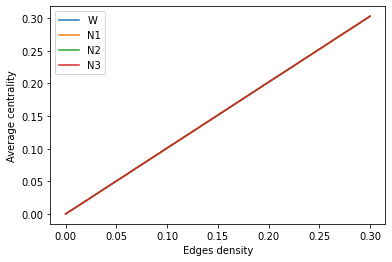

In [136]:
plt.plot(densities, avg_centrality.T);
plt.legend(names)
plt.xlabel('Edges density')
plt.ylabel('Average centrality');

In [ ]:
 # caminos mas cortos
 # seguir aca MAJO
 for C in (G_N1_UMBRAL.subgraph(c).copy() for c in nx.connected_components(G_N1_UMBRAL)):
     print(nx.average_shortest_path_length(C))

avg_shortest_path = []
names= []
for name, Gs in graphs.items():

    avg_clustering_ = [nx.average_clustering(G) for G in Gs]
    names_ = name

    avg_clustering.append(avg_clustering_)
    names.append(names_)
avg_clustering = np.vstack(avg_clustering)

## Tarea 2

In [103]:
W=matrices[0]
W.to_numpy()

W=W.to_numpy()
G_obs = nx.from_numpy_matrix(W)# u

In [104]:
pos=nx.spring_layout(graphs["W"][12], k=0.4)

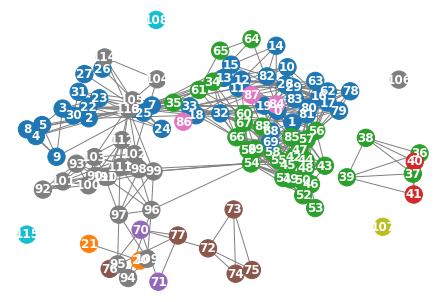

In [107]:
modulos = community.best_partition(graphs["N1"][15])
values_obs = [v for n,v in modulos.items()]
nx.draw(graphs["W"][12],pos=pos, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values_obs, font_color='white', edge_color='gray')

In [108]:
#Es el comando best_partition. Luego se le mide la modularidad al resultado de best_partition y en principio ahí te da el número.
estadio=[]
comunidades=[]
comunidades2=[]
densidad=[]
modularidad=[]
modularidad2=[]

for e in estadios:
    for i,G in enumerate (graphs[e][::5][:10]):
        estadio.append(e)
        densidad.append(densities[i*5])
        partition=community.best_partition(G)

        comunidades.append(float(len(set(partition.values()))))
        modularidad.append(community.modularity(partition,G))

        G2 = nx.gnm_random_graph(G.number_of_nodes(),G.number_of_edges())  
        partition2 = community.best_partition(G2)
        comunidades2.append(float(len(set(partition2.values()))))
        modularidad2.append(community.modularity(partition2, G2))



<function matplotlib.pyplot.show>

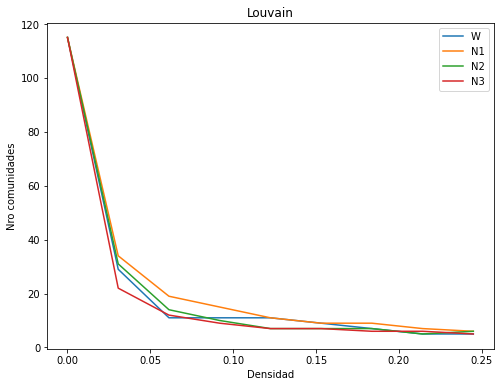

In [109]:
plt.figure(figsize=(8,6))
plt.plot(densidad[0:9],comunidades[0:9], label="W")
plt.plot(densidad[0:9],comunidades[10:19], label="N1")
plt.plot(densidad[0:9],comunidades[20:29], label="N2")
plt.plot(densidad[0:9],comunidades[30:39], label="N3")
plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("Louvain");
plt.legend();
plt.show


<function matplotlib.pyplot.show>

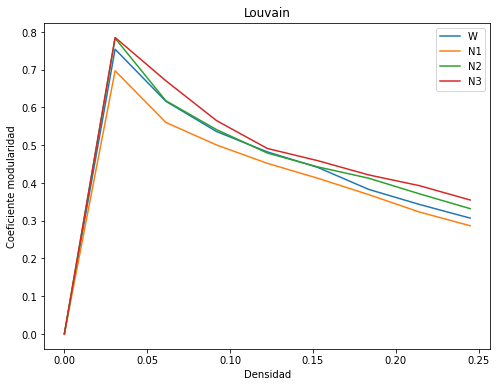

In [110]:
plt.figure(figsize=(8,6))
plt.plot(densidad[0:9],modularidad[0:9], label="W")
plt.plot(densidad[0:9],modularidad[10:19], label="N1")
plt.plot(densidad[0:9],modularidad[20:29], label="N2")
plt.plot(densidad[0:9],modularidad[30:39], label="N3")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("Louvain");
plt.legend();
plt.show

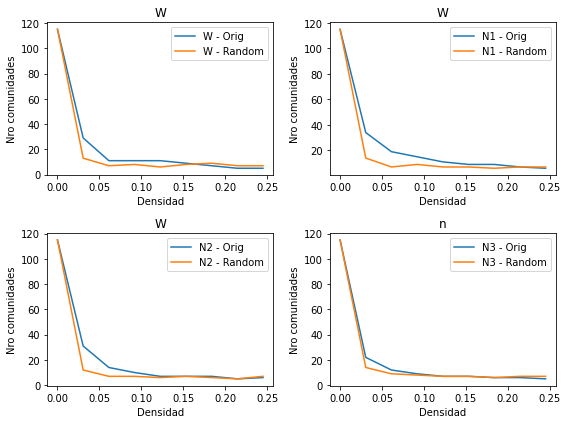

In [111]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.plot(densidad[0:9],comunidades[0:9], label="W - Orig")
plt.plot(densidad[0:9],comunidades2[0:9], label="W - Random")
plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("W");
plt.legend();

plt.subplot(2,2,2)
plt.plot(densidad[0:9],comunidades[10:19], label="N1 - Orig")
plt.plot(densidad[0:9],comunidades2[10:19], label="N1 - Random")
plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("W");
plt.legend();

plt.subplot(2,2,3)
plt.plot(densidad[0:9],comunidades[20:29], label="N2 - Orig")
plt.plot(densidad[0:9],comunidades2[20:29], label="N2 - Random")
plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("W");
plt.legend();


plt.subplot(2,2,4)
plt.plot(densidad[0:9],comunidades[30:39], label="N3 - Orig")
plt.plot(densidad[0:9],comunidades2[30:39], label="N3 - Random")
plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("n")
plt.legend();

plt.tight_layout()


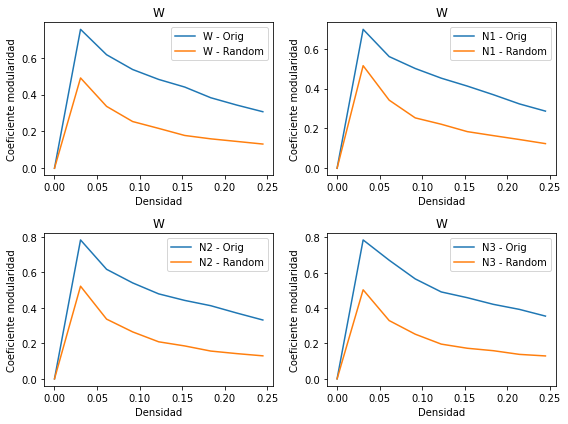

In [112]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.plot(densidad[0:9],modularidad[0:9], label="W - Orig")
plt.plot(densidad[0:9],modularidad2[0:9], label="W - Random")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("W");
plt.legend();

plt.subplot(2,2,2)
plt.plot(densidad[0:9],modularidad[10:19], label="N1 - Orig")
plt.plot(densidad[0:9],modularidad2[10:19], label="N1 - Random")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("W");
plt.legend();

plt.subplot(2,2,3)
plt.plot(densidad[0:9],modularidad[20:29], label="N2 - Orig")
plt.plot(densidad[0:9],modularidad2[20:29], label="N2 - Random")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("W");
plt.legend();


plt.subplot(2,2,4)
plt.plot(densidad[0:9],modularidad[30:39], label="N3 - Orig")
plt.plot(densidad[0:9],modularidad2[30:39], label="N3 - Random")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("W");
plt.legend();

plt.tight_layout()


<function matplotlib.pyplot.show>

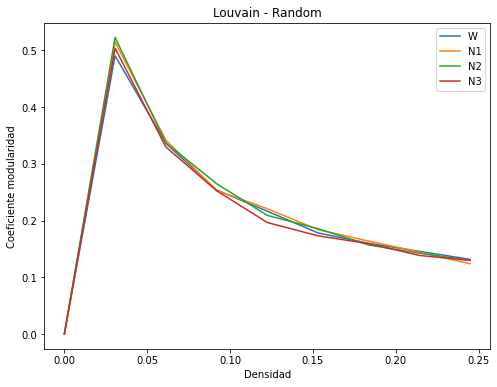

In [113]:
plt.figure(figsize=(8,6))
plt.plot(densidad[0:9],modularidad2[0:9], label="W")
plt.plot(densidad[0:9],modularidad2[10:19], label="N1")
plt.plot(densidad[0:9],modularidad2[20:29], label="N2")
plt.plot(densidad[0:9],modularidad2[30:39], label="N3")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("Louvain - Random");
plt.legend();
plt.show

In [114]:
repetitions = 50
data = []
for i in range(repetitions):
    d = {}
    for j in  range(0 , len(densities)):
      G = nx.barabasi_albert_graph(graphs["W"][j].number_of_nodes(),4,seed=i)
      d['ba_avg_clus'] = nx.average_clustering(G)
      d['ba_avg_degree'] = G.number_of_edges()/G.number_of_nodes()
      d['ba_alpha'] = powerlaw.Fit([d for n, d in G.degree],discrete=True,xmin=8).alpha
      G = nx.gnm_random_graph(graphs["W"][j].number_of_nodes(),graphs["W"][j].number_of_edges())    
      d['er_avg_clus'] = nx.average_clustering(G)
      G = nx.watts_strogatz_graph(graphs["W"][j].number_of_nodes(),8,0.02)
      d['ws_avg_degree']=G.number_of_edges()/G.number_of_nodes()
      d['ws_avg_clus'] = nx.average_clustering(G)
      data.append(d)

/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


NameError: ignored

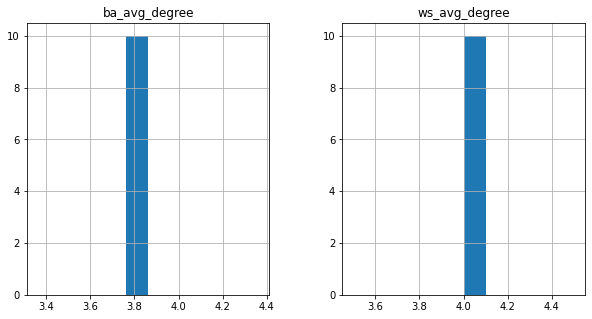

In [118]:
#G1=graphs["W"][12]
#promedio=G1.number_of_edges()/G1.number_of_nodes()
df = pd.DataFrame(data)
axs = df.filter(regex='avg_degree').hist(figsize=(10,5),density=True)
for ax in axs.flatten():
    ax.vlines(promedio,0,20,lw=3,color='r')

<Figure size 576x288 with 0 Axes>

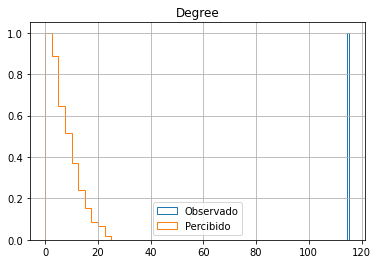

In [137]:
df_per_degree = pd.DataFrame(graphs["W"][12].degree,columns=['Node','Degree']).set_index('Node')
df_obs_degree = pd.DataFrame(G_obs.degree,columns=['Node','Degree']).set_index('Node')


plt.figure(figsize=(8,4));
df_obs_degree.hist(density=True, histtype='step',label='Observado', cumulative=-1);
df_per_degree.hist(density=True,ax=plt.gca(), histtype='step',label='Percibido', cumulative=-1);
plt.legend();

In [138]:
def plotComparacionesNx_W(ttests, correccion = None):
    plt.figure(figsize = (30,20))

    metricas = {'Modularidad': 'Q', 'Numero de Comunidades': 'Nc'}
    nro_subplot = 1

    for metrica in metricas:
        metrica_val = metricas[metrica]
        for etapa in ['N1', 'N2', 'N3']:
            # Filtramos los sujetos del estadio Nx
            filtro = ttests.query('Nx == "' + etapa + '"')

            # Config inicial del subplot
            plt.subplot(3, 3, nro_subplot)
            plt.title('W vs ' + etapa)
            plt.xlabel('Densidad de aristas (d)')
            plt.ylabel(metrica + ' (' + metrica_val + ')')

            # Plot curva Nx
            plt.errorbar(rango_tp, filtro['mean_Nx_' + metrica_val], yerr = filtro['sem_Nx_' + metrica_val], label = metrica + ' - ' + etapa)
            # Plot curva W
            plt.errorbar(rango_tp, filtro['mean_W_' + metrica_val], yerr = filtro['sem_Nx_' + metrica_val], label = metrica + ' - W')
            # Plot puntos significativos
            label = 'Significativas'
            if correccion:
                label += ' ' + correccion
                filtro_pvalue = filtro[ isSignificative(filtro['pvalue_' + metrica_val], nivel_signif, {'metodo': correccion, 'n': len(rango_tp)}) ]
            else:
                filtro_pvalue = filtro[ isSignificative(filtro['pvalue_' + metrica_val], nivel_signif) ]
            #filtro_pvalue = filtro.query('pvalue_' + metrica_val + ' < ' + str(nivel_signif))
            plt.plot(filtro_pvalue.densidad, np.repeat(0, filtro_pvalue.shape[0]), color='green', marker='o', linestyle='none', markersize=6, label=label)

            # Config leyenda del subplot
            leg = plt.legend(loc='upper right', ncol=1, shadow=True, fancybox=True)
            leg.get_frame().set_alpha(0.5)
            
            nro_subplot += 1

In [ ]:
#armar dataframe de tests




## Tarea 3 - todos los sujetos

In [144]:
def creaMatriz(n,m):
 '''
 Esta función crea una matríz vacía con n filas y n columnas.
 @param n : Número de filas.
 @param m : Número de columnas
 @type n: int
 @type m: int
 @return: devuelve una matriz n por m
 @rtype: matriz (lista de listas)
 '''
 matriz = []
 for i in range(n):
  a = [0]*m
  matriz.append(a)
 return matriz

In [146]:
#Es el comando best_partition. Luego se le mide la modularidad al resultado de best_partition y en principio ahí te da el número.
estadio=[]
comunidades=[]
comunidades2=[]
densidad=[]
modularidad=[]
modularidad2=[]
medias_com_W=[0]*50
medias_mod_W=[0]*50

medias_com_N1=[0]*50
medias_mod_N1=[0]*50

medias_com_N2=[0]*50
medias_mod_N2=[0]*50

medias_com_N3=[0]*50
medias_mod_N3=[0]*50

#test_W = [[0]*18]*50
test_W =creaMatriz(50,18)
test_N1=creaMatriz(50,18)
test_N2=creaMatriz(50,18)
test_N3=creaMatriz(50,18)

test_W_mod =creaMatriz(50,18)
test_N1_mod=creaMatriz(50,18)
test_N2_mod=creaMatriz(50,18)
test_N3_mod=creaMatriz(50,18)

#W
for i in range(0,18,1):
    test_W_com_=[]
    for j in range(0,50,1):
      #print(i,j)
      G = graphs_sujeto[i][j]
      partition = community.best_partition(G)
      densidad.append(densities[j])
            
      comunidades.append(float(len(set(partition.values()))))
      modularidad.append(community.modularity(partition,G))


      G2 = nx.gnm_random_graph(G.number_of_nodes(),G.number_of_edges())  
      partition2 = community.best_partition(G2)
      comunidades2.append(float(len(set(partition2.values()))))
      modularidad2.append(community.modularity(partition2, G2))

      medias_com_W[j]= medias_com_W[j]+float(len(set(partition.values())))
      medias_mod_W[j]= medias_mod_W[j]+community.modularity(partition,G)

      #print('sujeto',i,'densidad',j)
      test_W[j][i] = float(len(set(partition.values())))
      test_W_mod[j][i] = community.modularity(partition,G)
      #print(float(len(set(partition.values()))))
      

medias_com_W=np.array(medias_com_W)/18
medias_mod_W=np.array(medias_mod_W)/18

for i in range(18,36,1):
    for j in range(0,50,1):
      #print(i,j)
      G = graphs_sujeto[i][j]
      partition = community.best_partition(G)
            
      comunidades.append(float(len(set(partition.values()))))
      modularidad.append(community.modularity(partition,G))


      G2 = nx.gnm_random_graph(G.number_of_nodes(),G.number_of_edges())  
      partition2 = community.best_partition(G2)
      comunidades2.append(float(len(set(partition2.values()))))
      modularidad2.append(community.modularity(partition2, G2))

      medias_com_N1[j]= medias_com_N1[j]+float(len(set(partition.values())))
      medias_mod_N1[j]= medias_mod_N1[j]+community.modularity(partition,G)

      #test_N1_com[j]=float(len(set(partition.values())))
      test_N1[j][i-18] = float(len(set(partition.values())))
      test_N1_mod[j][i-18] = community.modularity(partition,G)

medias_com_N1=np.array(medias_com_N1)/18
medias_mod_N1=np.array(medias_mod_N1)/18

for i in range(36,54,1):
    for j in range(0,50,1):
      #print(i,j)
      G = graphs_sujeto[i][j]
      partition = community.best_partition(G)
            
      comunidades.append(float(len(set(partition.values()))))
      modularidad.append(community.modularity(partition,G))


      G2 = nx.gnm_random_graph(G.number_of_nodes(),G.number_of_edges())  
      partition2 = community.best_partition(G2)
      comunidades2.append(float(len(set(partition2.values()))))
      modularidad2.append(community.modularity(partition2, G2))

      medias_com_N2[j]= medias_com_N2[j]+float(len(set(partition.values())))
      medias_mod_N2[j]= medias_mod_N2[j]+community.modularity(partition,G)

      test_N2[j][i-36] = float(len(set(partition.values())))
      test_N2_mod[j][i-36] = community.modularity(partition,G)

medias_com_N2=np.array(medias_com_N2)/18
medias_mod_N2=np.array(medias_mod_N2)/18

for i in range(54,72,1):
    for j in range(0,50,1):
      #print(i,j)
      G = graphs_sujeto[i][j]
      partition = community.best_partition(G)
            
      comunidades.append(float(len(set(partition.values()))))
      modularidad.append(community.modularity(partition,G))


      G2 = nx.gnm_random_graph(G.number_of_nodes(),G.number_of_edges())  
      partition2 = community.best_partition(G2)
      comunidades2.append(float(len(set(partition2.values()))))
      modularidad2.append(community.modularity(partition2, G2))

      medias_com_N3[j]= medias_com_N3[j]+float(len(set(partition.values())))
      medias_mod_N3[j]= medias_mod_N3[j]+community.modularity(partition,G)

      test_N3[j][i-54] = float(len(set(partition.values())))
      test_N3_mod[j][i-54] = community.modularity(partition,G)


medias_com_N3=np.array(medias_com_N3)/18
medias_mod_N3=np.array(medias_mod_N3)/18
    

<function matplotlib.pyplot.show>

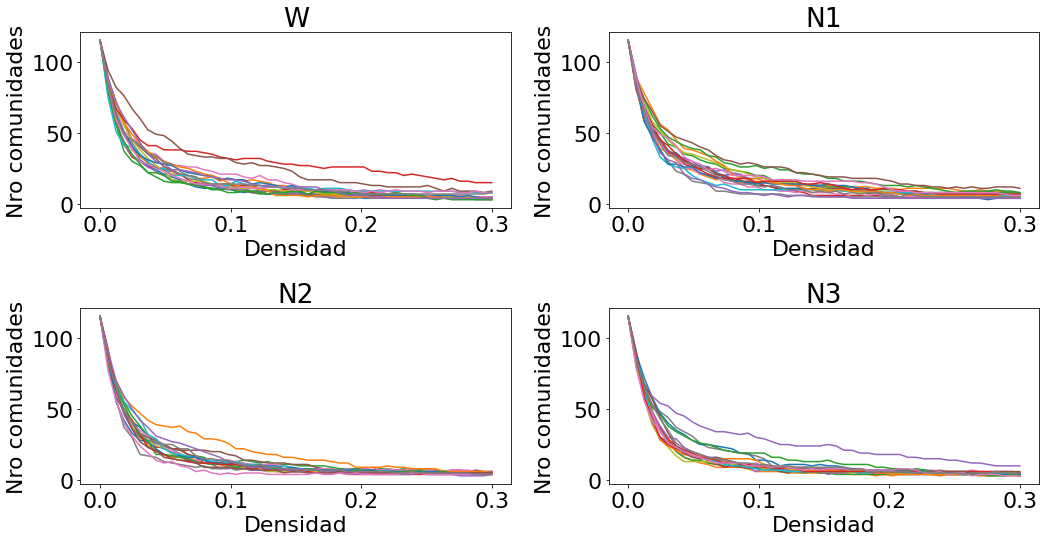

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],comunidades[i*50:i*50+50])
  #plt.plot(densidad[0:900],comunidades[900:1800], label="N1")
  #plt.plot(densidad[0:900],comunidades[1800:2700], label="N2")
  #plt.plot(densidad[0:900],comunidades[2700:3600], label="N3")

plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("W");


plt.subplot(2,2,2)
for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],comunidades[900+i*50:900+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("N1");

plt.subplot(2,2,3)
for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],comunidades[1800+i*50:1800+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("N2");


plt.subplot(2,2,4)
for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],comunidades[2700+i*50:2700+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("N3",);

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show>

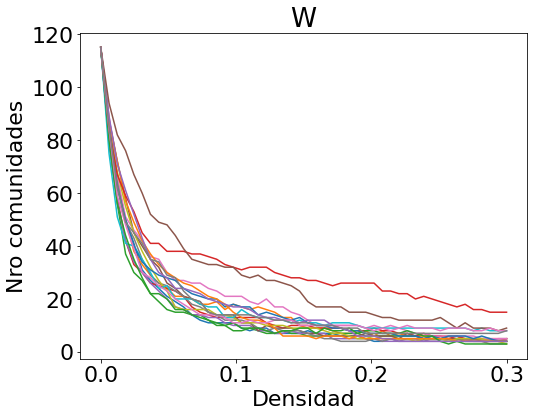

In [ ]:
plt.figure(figsize=(8,6))

for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],comunidades[i*50:i*50+50])
  #plt.plot(densidad[0:900],comunidades[900:1800], label="N1")
  #plt.plot(densidad[0:900],comunidades[1800:2700], label="N2")
  #plt.plot(densidad[0:900],comunidades[2700:3600], label="N3")

plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("W");
plt.show

<function matplotlib.pyplot.show>

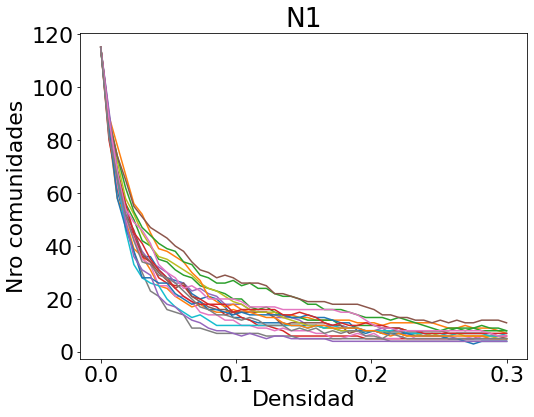

In [ ]:
plt.figure(figsize=(8,6))

for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],comunidades[900+i*50:900+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("N1");

plt.show

<function matplotlib.pyplot.show>

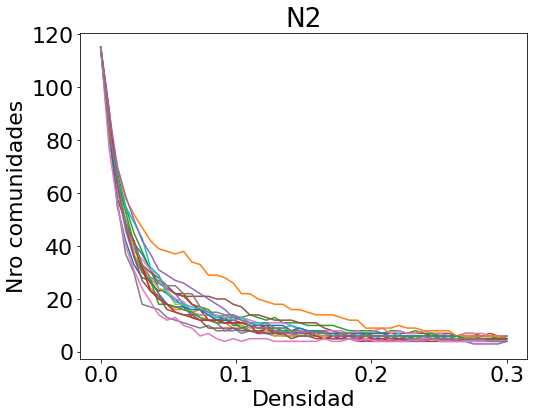

In [ ]:
plt.figure(figsize=(8,6))

for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],comunidades[1800+i*50:1800+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("N2");

plt.show

<function matplotlib.pyplot.show>

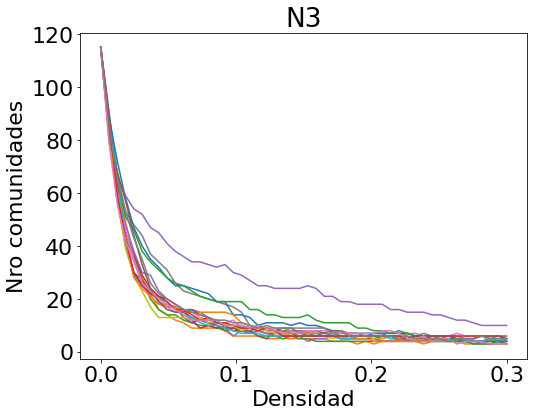

In [ ]:
plt.figure(figsize=(8,6))

for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],comunidades[2700+i*50:2700+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("N3");

plt.show

<function matplotlib.pyplot.show>

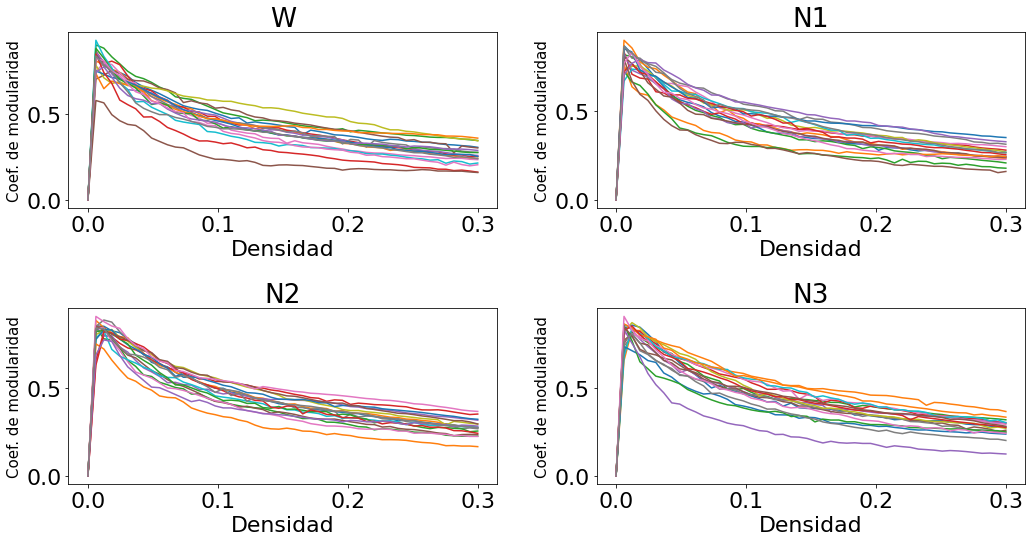

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],modularidad[i*50:i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Coef. de modularidad", fontsize=15)
plt.title("W");

plt.subplot(2,2,2)
for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],modularidad[900+i*50:900+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Coef. de modularidad", fontsize=15)
plt.title("N1");

plt.subplot(2,2,3)
for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],modularidad[1800+i*50:1800+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Coef. de modularidad", fontsize=15)
plt.title("N2");

plt.subplot(2,2,4)
for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],modularidad[2700+i*50:2700+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Coef. de modularidad", fontsize=15)
plt.title("N3");

plt.tight_layout()
plt.show


<function matplotlib.pyplot.show>

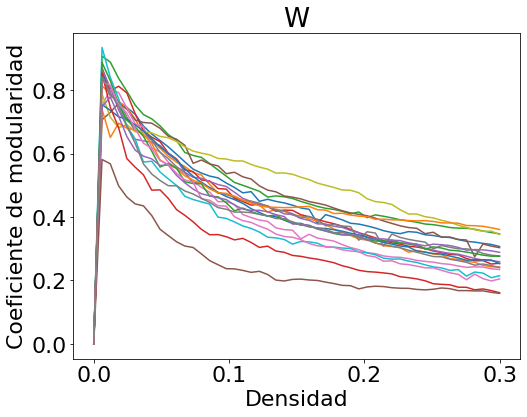

In [ ]:
plt.figure(figsize=(8,6))


for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],modularidad[i*50:i*50+50])
  #plt.plot(densidad[0:900],comunidades[900:1800], label="N1")
  #plt.plot(densidad[0:900],comunidades[1800:2700], label="N2")
  #plt.plot(densidad[0:900],comunidades[2700:3600], label="N3")

plt.xlabel("Densidad")
plt.ylabel("Coeficiente de modularidad")
plt.title("W");




plt.show

<function matplotlib.pyplot.show>

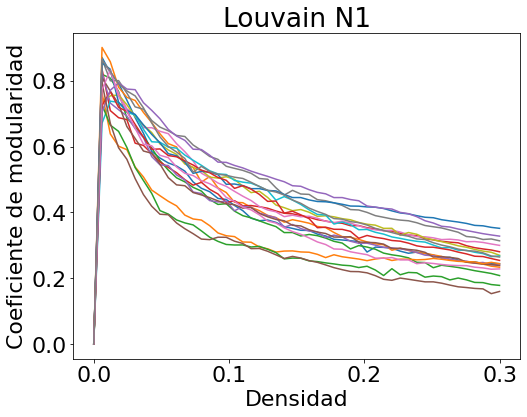

In [ ]:
plt.figure(figsize=(8,6))

for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],modularidad[900+i*50:900+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Coeficiente de modularidad")
plt.title("Louvain N1");
plt.show

<function matplotlib.pyplot.show>

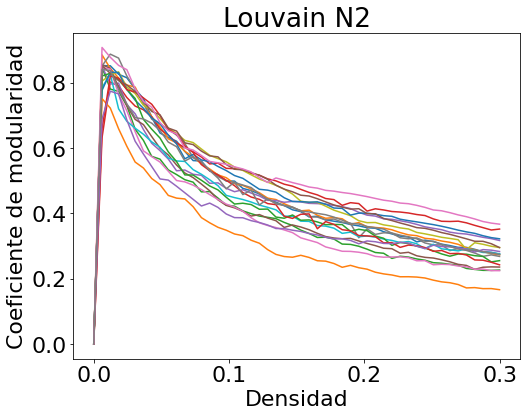

In [ ]:
plt.figure(figsize=(8,6))

for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],modularidad[1800+i*50:1800+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Coeficiente de modularidad")
plt.title("Louvain N2");
plt.show

<function matplotlib.pyplot.show>

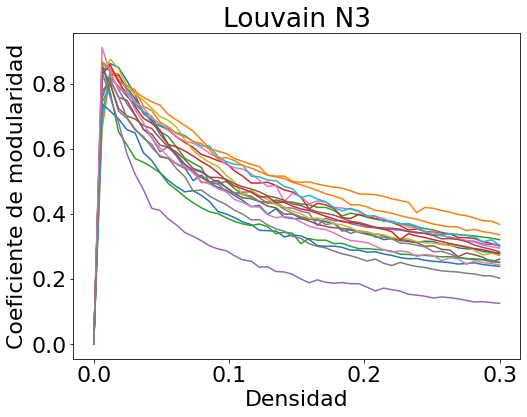

In [ ]:
plt.figure(figsize=(8,6))

for i in range(0,18,1):

  plt.plot(densidad[i*50:i*50+50],modularidad[2700+i*50:2700+i*50+50])
 

plt.xlabel("Densidad")
plt.ylabel("Coeficiente de modularidad")
plt.title("Louvain N3");
plt.show

# Comparar promedios


In [ ]:
p_valueN1_W=[]
for i in range(0,50):
  s,p=ttest_ind(test_N1[i],test_W[i])
  p_valueN1_W.append(p)

p_valueN1_W= np.asarray(p_valueN1_W)


p_valueN1_W[p_valueN1_W<0.05] = 0
p_valueN1_W[p_valueN1_W>=0.05] =None

p_valueN1_W

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

Ttest_indResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<function matplotlib.pyplot.show>

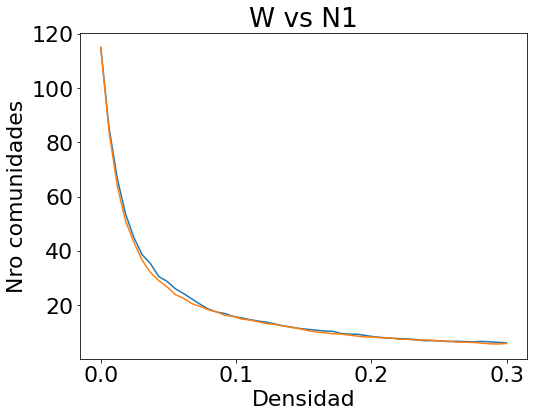

In [ ]:
from scipy.stats import ttest_ind

test_N1_W=ttest_ind(medias_com_N1[0], medias_com_W[0])
print(test_N1_W)

plt.plot(densidad[0:50],medias_com_N1)
plt.plot(densidad[0:50],medias_com_W)
plt.plot(densidad[0:50],p_valueN1_W,'k*')


plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("W vs N1");
plt.show



In [ ]:
medias_com_N1

array([115.        ,  85.44444444,  66.61111111,  53.55555556,
        44.88888889,  38.55555556,  35.27777778,  30.5       ,
        28.72222222,  26.        ,  24.22222222,  22.22222222,
        20.27777778,  18.5       ,  17.38888889,  16.83333333,
        15.77777778,  15.22222222,  14.61111111,  14.05555556,
        13.66666667,  13.        ,  12.33333333,  11.83333333,
        11.33333333,  11.        ,  10.72222222,  10.38888889,
        10.27777778,   9.5       ,   9.22222222,   9.22222222,
         8.72222222,   8.27777778,   8.        ,   7.72222222,
         7.61111111,   7.5       ,   7.27777778,   6.83333333,
         6.83333333,   6.77777778,   6.5       ,   6.61111111,
         6.5       ,   6.38888889,   6.55555556,   6.38888889,
         6.22222222,   6.        ])

In [ ]:
p_valueN2_W=[]
for i in range(0,50):
  s,p=ttest_ind(test_N2[i],test_W[i])
  p_valueN2_W.append(p)

p_valueN2_W= np.asarray(p_valueN2_W)
p_valueN2_W[p_valueN2_W<0.05] = 0
p_valueN2_W[p_valueN2_W>=0.05] =None

#p_valueN2_W[7:25]=0

p_valueN2_W

array([nan, nan, nan, nan, nan, nan, nan,  0.,  0., nan, nan, nan, nan,
       nan,  0., nan,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

Ttest_indResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<function matplotlib.pyplot.show>

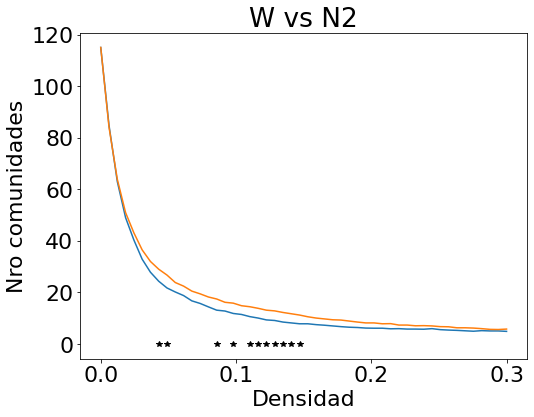

In [ ]:
test_N2_W=ttest_ind(medias_com_N2[0], medias_com_W[0])
print(test_N2_W)

plt.plot(densidad[0:50],medias_com_N2)
plt.plot(densidad[0:50],medias_com_W)
plt.plot(densidad[0:50],p_valueN2_W,'k*')

plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("W vs N2");
plt.show

In [ ]:
p_valueN3_W=[]
for i in range(0,50):
  s,p=ttest_ind(test_N3[i],test_W[i])
  p_valueN3_W.append(p)

p_valueN3_W= np.asarray(p_valueN3_W)

p_valueN3_W[p_valueN3_W<0.05] = 0
p_valueN3_W[p_valueN3_W>=0.05] =None

#p_valueN3_W[11:25]=0
p_valueN3_W

array([nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan,
       nan, nan, nan, nan, nan,  0.,  0., nan,  0., nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

Ttest_indResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<function matplotlib.pyplot.show>

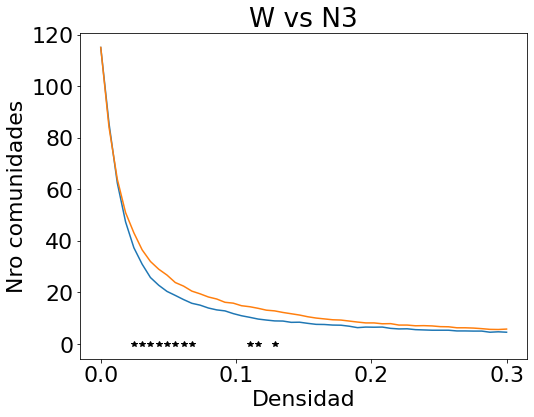

In [ ]:
test_N3_W=ttest_ind(medias_com_N3[0], medias_com_W[0])
print(test_N3_W)

plt.plot(densidad[0:50],medias_com_N3)
plt.plot(densidad[0:50],medias_com_W)
plt.plot(densidad[0:50],p_valueN3_W,'k*')


plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("W vs N3");
plt.show

Comparacion con Coef. de modularidad

In [ ]:
p_valueN1_W_mod=[]
for i in range(0,50):
  s,p=ttest_ind(test_N1_mod[i],test_W_mod[i])
  p_valueN1_W_mod.append(p)

p_valueN1_W_mod= np.asarray(p_valueN1_W_mod)


p_valueN1_W_mod[p_valueN1_W_mod<0.05] = 0
p_valueN1_W_mod[p_valueN1_W_mod>=0.05] =None

p_valueN1_W_mod


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

Ttest_indResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<function matplotlib.pyplot.show>

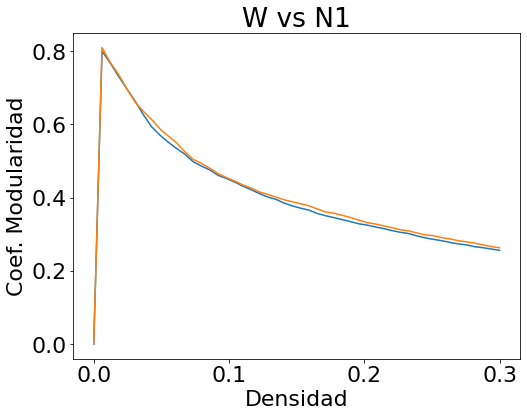

In [ ]:
test_N1_W_mod=ttest_ind(medias_mod_N1[0], medias_mod_W[0])
print(test_N1_W_mod)

plt.plot(densidad[0:50],medias_mod_N1)
plt.plot(densidad[0:50],medias_mod_W)
plt.plot(densidad[0:50],p_valueN1_W_mod,'k*')


plt.xlabel("Densidad")
plt.ylabel("Coef. Modularidad")
plt.title("W vs N1");
plt.show


In [ ]:
p_valueN2_W_mod=[]
for i in range(0,50):
  s,p=ttest_ind(test_N2_mod[i],test_W_mod[i])
  p_valueN2_W_mod.append(p)

p_valueN2_W_mod= np.asarray(p_valueN2_W_mod)


p_valueN2_W_mod[p_valueN2_W_mod<0.05] = 0
p_valueN2_W_mod[p_valueN2_W_mod>=0.05] =None

p_valueN2_W_mod

array([nan, nan,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

Ttest_indResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<function matplotlib.pyplot.show>

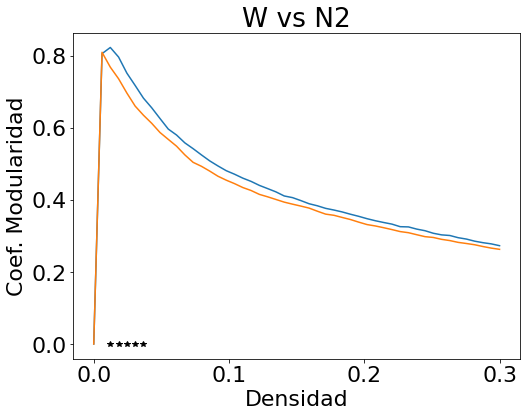

In [ ]:
test_N2_W_mod=ttest_ind(medias_mod_N2[0], medias_mod_W[0])
print(test_N2_W_mod)

plt.plot(densidad[0:50],medias_mod_N2)
plt.plot(densidad[0:50],medias_mod_W)
plt.plot(densidad[0:50],p_valueN2_W_mod,'k*')


plt.xlabel("Densidad")
plt.ylabel("Coef. Modularidad")
plt.title("W vs N2");
plt.show


In [ ]:
p_valueN3_W_mod=[]
for i in range(0,50):
  s,p=ttest_ind(test_N3_mod[i],test_W_mod[i])
  p_valueN3_W_mod.append(p)

p_valueN3_W_mod= np.asarray(p_valueN3_W_mod)


p_valueN3_W_mod[p_valueN3_W_mod<0.05] = 0
p_valueN3_W_mod[p_valueN3_W_mod>=0.05] =None

p_valueN3_W_mod

array([nan, nan,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

Ttest_indResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<function matplotlib.pyplot.show>

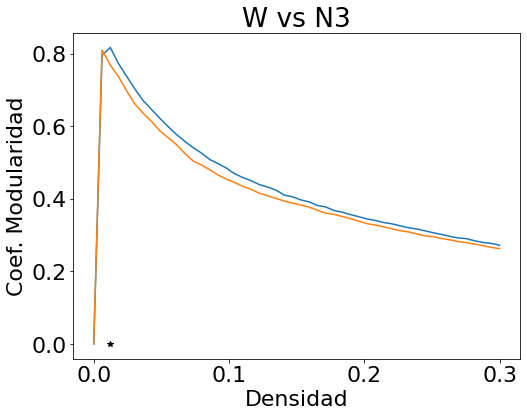

In [ ]:
test_N3_W_mod=ttest_ind(medias_mod_N3[0], medias_mod_W[0])
print(test_N3_W_mod)

plt.plot(densidad[0:50],medias_mod_N3)
plt.plot(densidad[0:50],medias_mod_W)
plt.plot(densidad[0:50],p_valueN3_W_mod,'k*')


plt.xlabel("Densidad")
plt.ylabel("Coef. Modularidad")
plt.title("W vs N3");
plt.show

## Tarea 4

Diferencias de membresias

In [147]:
# sujeto estadio matriz
# df_estadios_sujetos

matrices_sujetos2=[]
estadios_sujetos=[]
sujetos=[]

for e in estadios:
    
    # leo y sumo las matrices de todos los sujetos para el estadio e 
    filenames = glob('DataSujetos/'+e+'_*.csv')   

    for filename in filenames:
        correlation_matrix = pd.read_csv(filename, header=None)
       
        n = correlation_matrix.shape[0]
        correlation_matrix -= np.diag(np.ones(n))

        matrices_sujetos2.append(correlation_matrix)
        estadios_sujetos.append(e)
        
        posfin=len(filename)-4
        if e=="W":
          posini=filename.find(e) +5
        else:
          posini=filename.find(e) +6
        
        sujetos.append(filename[posini:posfin])
        
import pandas as pd

df_estadios_sujetos=pd.concat([pd.Series(sujetos),pd.Series(estadios_sujetos)], axis=1)
   
# df_estadios_sujetos=pd.DataFrame(data=df_estadios_sujetos,columns=["matriz", "estadio","sujeto"])

In [154]:
df_estadios_sujetos['matriz']=matrices_sujetos2
df_estadios_sujetos.columns=['sujeto','estadio','matriz']

In [ ]:
df_estadios_sujetos

In [156]:
from itertools import combinations
from sklearn.metrics import adjusted_rand_score

def matricescorrelacion_to_randindex(M1,M2,densidad):
  
  L1 = community.best_partition(subjectmatrix2graphslist_2_TO_ONE(M1, densidad))
  L1=np.array(list(L1.values()))
  L2 = community.best_partition(subjectmatrix2graphslist_2_TO_ONE(M2, densidad))
  L2=np.array(list(L2.values()))

  rand=adjusted_rand_score(L1,L2)
  return rand

# df = df_estadios_sujetos =
# id sujeto estadio matriz
# 1  S1     W       M1
# 2  S1     N1      M2 
# 3  .      .       .

def listas_de_matrices_a_distribucion_de_randindex(matrices, etiquetas, densidad):
# aca guardo los indices rand
  # global ris
  ris = []
  for etiqueta in np.unique(etiquetas):
    L = matrices[matrices['estadio']==etiqueta]['matriz']
    for M1, M2 in list(combinations(L,2)):
      ri = matricescorrelacion_to_randindex(M1,M2,densidad)
      lista=[]
      lista.append(etiqueta)
      lista.append(densidad)
      lista.append(ri)
      ris.append(lista)

  return ris

In [ ]:
# df_estadios_sujetos
from itertools import permutations
total=[]
for dens in densities:
  ris_grupos_correctos = listas_de_matrices_a_distribucion_de_randindex(df_estadios_sujetos, estadios, dens)
  total.append(ris_grupos_correctos)
  print(dens)
  # con esto puedo graficar media y SEM si se hace para varias densidades d


In [3]:
from itertools import permutations
import pandas as pd

# etiquetas_permutadas = permutations(df_estadios_sujetos['estadio'])


pd.DataFrame(permutations(df_estadios_sujetos['estadio']))

# avg_ri_permutada = np.mean(listas_de_matrices_a_distribucion_de_randindex(matrices, etiquetas_permutadas,d))
# avg_ri_permutada2 = np.mean(...
# avg_ri_permutada3 = np.mean(...

# para calcular el p cuento cuantos ri mayores que el ri_correcto ocurrieron


NameError: ignored

In [195]:
df_a=pd.DataFrame(np.vstack(total), columns=["estadio","densidad","ris"])
df_a['ris']=pd.to_numeric(df_a['ris'])
df_a['densidad']=pd.to_numeric(df_a['densidad'])
df_a.shape

(30600, 3)

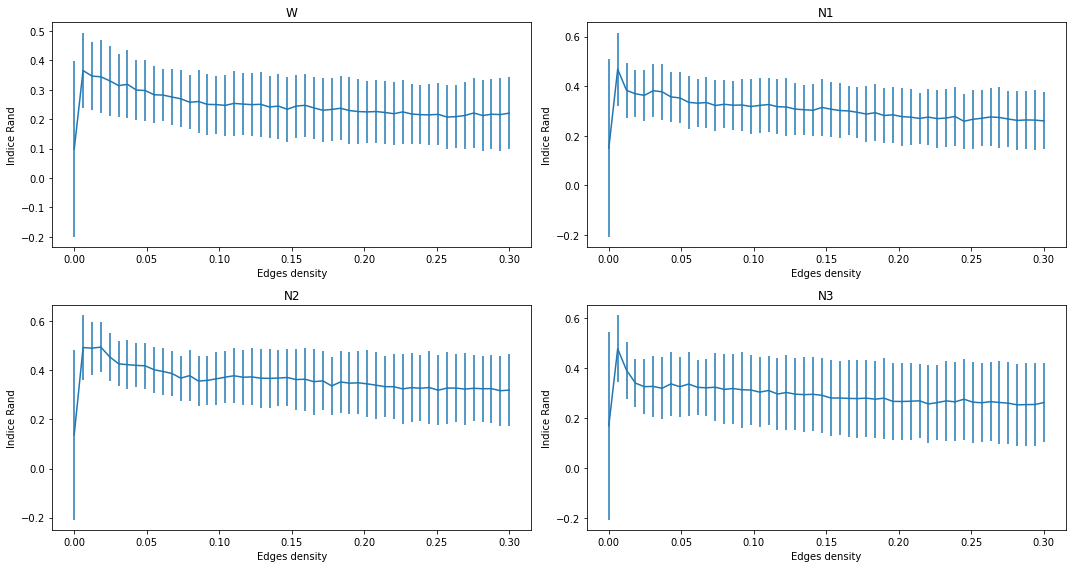

In [279]:
# promedios del indice rand within group
plt.figure(figsize=(15,8))

i=0

for est in estadios:
  i=i+1
  plt.subplot(2,2,i)
  densities2=np.hstack(np.unique(df_a[df_a['estadio']==est]['densidad']))

  u=df_a[(df_a.estadio==est) ].groupby(['densidad'])['ris'].mean()
  s=df_a[(df_a.estadio==est) ].groupby(['densidad'])['ris'].std()

  
  plt.errorbar(densities2,u,s);
  plt.xlabel('Edges density')
  plt.ylabel('Indice Rand');
  plt.title(est)

plt.tight_layout()